In [4]:
!pip install pytorch-lightning==1.6.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 582 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 418 kB 62.8 MB/s eta 0:00:01


In [7]:
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from skimage.io import imread
import torch
import pandas as pd
from glob import glob
import os

In [11]:
class MNISTDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
    
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = imread(self.images[idx])
        return torch.from_numpy(img), self.labels[idx]


class MNISTDataModule(pl.LightningDataModule):
    def __init__(self, path, batch_size):
        super().__init__()
        self.path = path
        self.batch_size = batch_size

    
    def generate_df(self, l1, l2):
        return pd.DataFrame({
            'image': l1 + l2,
            'label': [1] * len(l1) + [0] * len(l2)
        })

    
    def setup(self, stage = None):
        train_3 = glob(os.path.join(self.path, 'train', '3', '*.png'))
        train_no3 = glob(os.path.join(self.path, 'train', 'no3', '*.png'))
        self.train_df = self.generate_df(train_3, train_no3)
        test_3 = glob(os.path.join(self.path, 'test', '3', '*.png'))
        test_no3 = glob(os.path.join(self.path, 'test', 'no3', '*.png'))
        self.test_df = self.generate_df(test_3, test_no3)
        self.train_ds = MNISTDataset(self.train_df.image.values, self.train_df.label.values)
        self.test_ds = MNISTDataset(self.test_df.image.values, self.test_df.label.values)

    
    def train_dataloader(self):
        return DataLoader(self.train_ds, shuffle=True, batch_size=self.batch_size)

    
    def val_dataloader(self):
        return DataLoader(
            self.test_ds, 
            batch_size=self.batch_size if batch_size is None else batch_size,
            shuffle=shuffle
        )

In [12]:
from pathlib import Path

path = Path('dataset')

dm = MNISTDataModule(path, batch_size=25)
dm.setup()

imgs, labels = next(iter(dm.train_dataloader()))

imgs.shape, imgs.dtype, imgs.max(), imgs.min(), labels.shape

(torch.Size([25, 28, 28]),
 torch.uint8,
 tensor(255, dtype=torch.uint8),
 tensor(0, dtype=torch.uint8),
 torch.Size([25]))

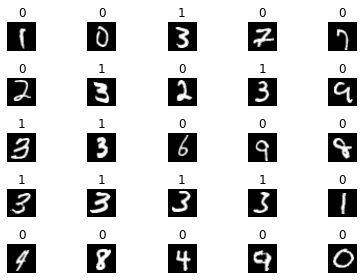

In [14]:
import matplotlib.pyplot as plt

rows, cols = 5, 5
fig, axs = plt.subplots(rows, cols)
imgs, labels = next(iter(dm.train_dataloader()))
for row in range(rows):
    for col in range(cols):
        axs[row, col].imshow(imgs[row * cols + col], cmap='gray')
        axs[row, col].set_title(labels[row * cols + col].item())
        axs[row, col].axis('off')
plt.tight_layout()
plt.show()

In [15]:
import torch.nn as nn
import torch.nn.functional as F

class MNISTModule(pl.LightningModule):
    def __init__(self):
        suerp().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels)
        )